In [1]:
# Import packages to use
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams.update({'errorbar.capsize': 2})

//anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Define the file to explore
file='resumen_N100_Niter5000000_beta4.0_dt3e-06_lf0.5_stf50_Nsimstot999_mul10.csv'

# Define the parameters for the simulation
N=100
beta=4.0
s=0.5
nu=-1/(beta+1)
dt=3e-6
Nsims=999

# Import the data file
df=pd.read_csv(file, engine='python')
print(df.columns.tolist())
print('Theoretical exponent (nu)= %g'%nu)

['t', 'log_t', 'N_avg', 'std_N', 'log_N']
Theoretical exponent (nu)= -0.2


In [5]:
# We account for the fact that there are 50 initial simulations without fusion
# Therefore we substract 50*dt from the time and create a new data frame
# We take the data from the 6-th index onwards to erase negative times
df50=df.copy()
df50['t']=df50['t']-50*dt
df50=df50[6:]
# Recalculate log(t)
df50['log_t']=np.log(df50['t'])

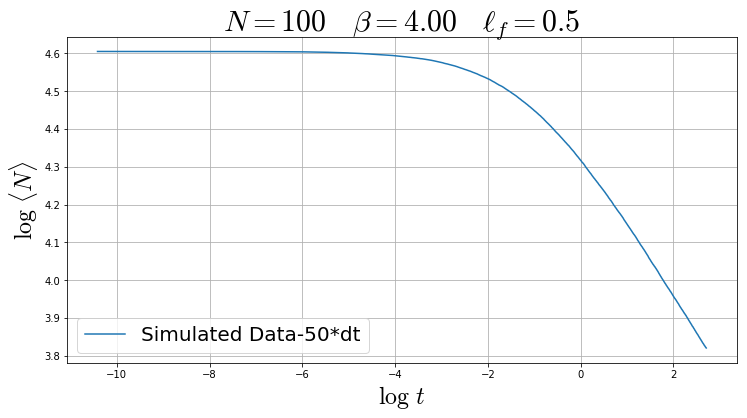

In [6]:
# Plot the entire log-data
# Plot the data 
plt.figure(figsize=(12,6))

plt.plot(df50.log_t,df50.log_N, label='Simulated Data-50*dt')

plt.xlabel(r'$\log \ t$',fontsize=24)
plt.ylabel(r'$\log \ \langle N \rangle $',fontsize=24)

plt.title(r'$N=%i \quad \beta=%.2f \quad \ell_f=%g$'%(N,beta,s),fontsize=30)
plt.grid(zorder=3)
plt.legend(fontsize=20)
plt.show()
plt.close()

In [7]:
# Cut the data in order to analyze the last part
# The cut-value can be changed and will change the results
cut=1
cut2=2.2
df_tail=df50[(df50['log_t']>cut) & (df50['log_t']<cut2)]

In [8]:
# Perform the linear regression for the asymptotic behaviour of the mean values
X=df_tail['log_t']
y=df_tail['log_N']

X = sm.add_constant(X)
model=sm.OLS(y,X)
results=model.fit()
nu_res=results.params[1]

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  log_N   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.196e+09
Date:                Thu, 04 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:48:04   Log-Likelihood:             1.2909e+06
No. Observations:              210224   AIC:                        -2.582e+06
Df Residuals:                  210222   BIC:                        -2.582e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3422   5.95e-06    7.3e+05      0.0

In [9]:
# Perform fit of the form y=ax+b
# Define function to calculate a,b,err_a,err_b
def regression(x,y,err_y):
    n=len(x)
    xiyi=np.sum(np.multiply(x,y))
    xi=np.sum(x)
    yj=np.sum(y)
    xi2=np.sum(np.square(x))
    xidyi=np.sum(np.multiply(x,err_y))
    dyj=np.sum(err_y)
    den=n*xi2-xi**2
    
    a=(n*xiyi-xi*yj)/den
    b=(xi2*yj-xi*xiyi)/den
    err_a=(n*xidyi-xi*dyj)/den
    err_b=(xi2*dyj-xi*xidyi)/den
    
    return a,b,err_a,err_b

In [10]:
xreg=df_tail['log_t']
yreg=df_tail['log_N']
y_err=np.divide(df_tail['std_N'],df_tail['N_avg'])

nu_res,intercept,err_nu,err_int=regression(xreg,yreg,y_err)
print('nu-exponent: %f'%nu_res)
print('nu-error: %f'%err_nu)
print('constant: %f'%intercept)
print('constant error: %f'%err_int)


nu-exponent: -0.192116
nu-error: 0.004698
constant: 4.342150
constant error: 0.049841


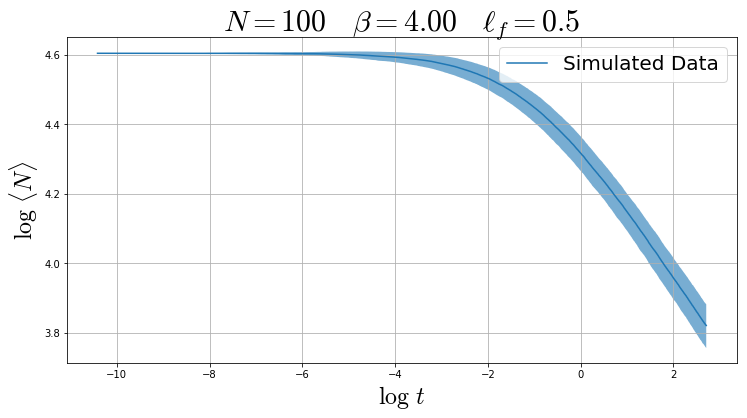

In [17]:
plt.figure(figsize=(12,6))

plt.plot(df.log_t,df.log_N,label='Simulated Data')

upper=np.log(df['N_avg']+df['std_N'])
lower=np.log(df['N_avg']-df['std_N'])
plt.fill_between(df.log_t,upper,lower,alpha=0.6)

plt.title(r'$N=%i \quad \beta=%.2f \quad \ell_f=%g$'%(N,beta,s),fontsize=30)
plt.xlabel(r'$\log \ t$',fontsize=24)
plt.ylabel(r'$\log \ \langle N \rangle $',fontsize=24)

plt.grid(zorder=3)
plt.legend(fontsize=20)
plt.show()
plt.close()